In [1]:
import pandas as pd
import pickle

pickleload = lambda p: pickle.load(open(p, "rb"))


# Stats test

In [2]:
!ls ../data/pdb_complex_sequencesV2*

../data/pdb_complex_sequencesV2.parquet
../data/pdb_complex_sequencesV2_entire_cross_newemb__explained.parquet
../data/pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230817_060411__by_pdbid.csv
../data/pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709.csv
../data/pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709__by_pdbid.csv
../data/pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709_old.csv
../data/pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709_v2.csv
../data/pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709_v2__by_pdbid.csv
../data/pdb_complex_sequencesV2_entire_self__explained.parquet
../data/pdb_complex_sequencesV2_entire_self__explained__stats20230817_060411.csv
../data/pdb_complex_sequencesV2_entire_self__explained__stats20230817_060411__by_pdbid.csv
../data/pdb_complex_sequencesV2_entire_self_newemb__explained.parquet
../data/pd

In [3]:
!ls ../data/ | grep entire

analysis_result_of__mutation_study_entire_cross_newemb__explained.parquet
analysis_result_of__mutation_study_entire_self_newemb__explained.parquet
entire_data.parquet
mutation_study_entire_cross_newemb__explained.parquet
mutation_study_entire_self_newemb__explained.parquet
pdb_complex_sequencesV2_entire_cross_newemb__explained.parquet
pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230817_060411__by_pdbid.csv
pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709.csv
pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709__by_pdbid.csv
pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709_old.csv
pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709_v2.csv
pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709_v2__by_pdbid.csv
pdb_complex_sequencesV2_entire_self__explained.parquet
pdb_complex_sequencesV2_entire_self__explained__stats20230817_060411.csv
pdb_compl

In [4]:
# cross = pd.read_parquet("../data/pdb_complex_sequencesV2_entire_cross_newemb__explained.parquet")\
# .drop_duplicates("pdbid")
# cross = cross[cross['tcrb'].apply(len)!=0]
# cross = cross[cross['tcra'].apply(len)!=0]
# cross = cross[cross['peptide'].apply(len)!=0]

# dedup = cross.drop_duplicates(subset=['peptide', 'tcra','tcrb'])

In [5]:
df_entire = pd.read_parquet("../data/entire_data.parquet")

In [6]:
cross = pd.read_csv('../data/pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709.csv')
cross[' '].fillna(' ', inplace=True)
self = pd.read_csv('../data/pdb_complex_sequencesV2_entire_self_newemb__explained__stats20230828_015709.csv')
self[' '].fillna(' ',  inplace=True)
# cross['pdbid'].nunique(), self['index'].nunique()

cross = cross.rename(columns={'property':'Property', 
                              'Large Atten Mean. Mean(STD)':'Large Atten.', 
                              'Small Atten. Mean(STD)':'Small Atten.',
                              'side':'Side'
                             }).assign(Model='cross')
self = self.rename(columns={'property':'Property', 
                              'Large Atten Mean. Mean(STD)':'Large Atten.', 
                              'Small Atten. Mean(STD)':'Small Atten.',
                            'side':'Side'
                             }).assign(Model='self')


cols = ['Model','Side', 'Property', 'Large Atten.', 'Small Atten.','P Value', 'Head', ' ']

cross = cross[cols]
self = self[cols]

In [7]:
cross_pdb = pd.read_csv('../data/pdb_complex_sequencesV2_entire_cross_newemb__explained__stats20230828_015709__by_pdbid.csv')
self_pdb = pd.read_csv('../data/pdb_complex_sequencesV2_entire_self_newemb__explained__stats20230828_015709__by_pdbid.csv')


In [8]:
def print_a(cross_pdb):
    print(f"These are the {cross_pdb['index'].nunique()} IDs used in dataframe: "+",".join(cross_pdb['index'].unique()))

In [9]:
print_a(cross_pdb)

These are the 52 IDs used in dataframe: 2P5E,5HHO,1D9K,4JFD,4JFF,4JFE,1ZGL,4JRX,4JRY,3QEQ,2F54,2BNQ,3MBE,5NMG,6V13,4MJI,2AK4,3MV8,4PRH,4PRP,5MEN,2NX5,4P2O,4OZG,2PXY,2J8U,3PQY,3QIU,3QIW,3VXR,3VXS,3W0W,4Z7W,3HG1,4QOK,5WKF,5WKH,3GSN,5E6I,3QDJ,3DXA,2CKB,1G6R,4P2Q,4P2R,5EUO,5ISZ,2VLJ,2VLR,5TEZ,6EQA,6EQB


In [10]:
print_a(self_pdb)

These are the 54 IDs used in dataframe: 2P5E,5HHO,1D9K,4JFD,4JFF,4JFE,1ZGL,4JRX,4JRY,3QEQ,2F54,2BNQ,3MBE,5NMG,4MJI,2AK4,3MV8,4PRH,4PRP,5MEN,2NX5,5D2L,4P2O,4OZG,2PXY,1FYT,3PQY,3QIU,3QIW,3VXR,3VXS,3W0W,4OZH,4Z7W,3HG1,4QOK,5WKF,5WKH,5EU6,5E6I,3QDG,3QDJ,3DXA,2CKB,1G6R,4P2Q,4P2R,5EUO,5IVX,2VLJ,2VLR,5TEZ,6EQA,6EQB


In [11]:
pd.Series(cross_pdb['index'].unique().tolist() + self_pdb['index'].unique().tolist())

0      2P5E
1      5HHO
2      1D9K
3      4JFD
4      4JFF
       ... 
101    2VLJ
102    2VLR
103    5TEZ
104    6EQA
105    6EQB
Length: 106, dtype: object

In [12]:
cross_pdb['index'].nunique(), self_pdb['index'].nunique()

(52, 54)

In [13]:
cross_pdb.sample(6)

,index,Large is_connecting_to_pep,Small is_connecting_to_pep,Large is_connecting_to_cdr,Small is_connecting_to_cdr,Large is_connecting_to_ownchain_tcr,Small is_connecting_to_ownchain_tcr,Large is_connecting_to_ownchain_cdr,Small is_connecting_to_ownchain_cdr,Large is_connecting_to_opposite_chain_tcr,...,Large num_bonds,Small num_bonds,head,side,Large pepres__is_in_edge,Small pepres__is_in_edge,Large pepres__distance_value,Small pepres__distance_value,Large pepres__num_bonds,Small pepres__num_bonds
344,4Z7W,0.0,0.000000,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.0,...,NaN,NaN,1,peptide,0.0,0.428571,3.447877,5.703926,2.0,1.857143
503,5WKF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,all,peptide,NaN,NaN,NaN,4.733418,NaN,2.700000
147,4P2Q,1.0,0.115385,0.0,0.384615,1.0,0.653846,0.0,0.384615,0.0,...,4.0,1.615385,2,tcr,NaN,NaN,NaN,NaN,NaN,NaN
96,4P2R,0.0,0.038462,1.0,0.192308,1.0,0.461538,1.0,0.192308,0.0,...,2.0,1.153846,1,tcr,NaN,NaN,NaN,NaN,NaN,NaN
372,4JRY,0.0,0.000000,0.0,0.250000,0.0,0.000000,0.0,0.000000,0.0,...,NaN,NaN,2,peptide,1.0,0.416667,4.961361,5.959972,2.0,1.583333
12,3MBE,0.0,0.074074,0.0,0.555556,0.0,0.777778,0.0,0.555556,0.0,...,1.0,1.629630,0,tcr,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
pd.options.display.max_rows = 120

In [15]:
cross.dropna(subset=['P Value']).query('Head=="all"')

,Model,Side,Property,Large Atten.,Small Atten.,P Value,Head,
44,cross,tcr,Proportion is_connecting_to_pep,0.0822+-0.1359,0.0732+-0.0478,0.627758,all,
45,cross,tcr,Proportion is_connecting_to_cdr,0.5221+-0.2830,0.4271+-0.1030,0.031026,all,***
46,cross,tcr,Proportion is_connecting_to_ownchain_tcr,0.7045+-0.2214,0.6540+-0.0981,0.163364,all,
47,cross,tcr,Proportion is_connecting_to_ownchain_cdr,0.4926+-0.2884,0.4016+-0.0988,0.040827,all,***
48,cross,tcr,Proportion is_connecting_to_opposite_chain_tcr,0.1303+-0.1615,0.1604+-0.0794,0.270715,all,
49,cross,tcr,Proportion is_connecting_to_opposite_chain_cdr,0.0564+-0.1111,0.0550+-0.0557,0.922460,all,
50,cross,tcr,Proportion is_connecting_to_tcr,0.7716+-0.2323,0.7354+-0.0988,0.317543,all,
51,cross,tcr,Proportion is_connecting_to_notCDR_tcr,0.3771+-0.2599,0.4466+-0.0908,0.104083,all,
52,cross,tcr,Proportion digit4_is_in_edge,0.5256+-0.2145,0.6226+-0.0523,0.007731,all,***
53,cross,tcr,distance_value,7.5127+-2.7013,8.4488+-0.9691,0.015454,all,***


In [16]:
self.dropna(subset=['P Value']).query('Head=="all"')

,Model,Side,Property,Large Atten.,Small Atten.,P Value,Head,
44,self,tcr,Proportion is_connecting_to_pep,0.0820+-0.1129,0.0534+-0.0771,0.116118,all,
45,self,tcr,Proportion is_connecting_to_cdr,0.5361+-0.1713,0.4389+-0.1865,0.004630,all,***
46,self,tcr,Proportion is_connecting_to_ownchain_tcr,0.6881+-0.1537,0.6860+-0.1807,0.949770,all,
47,self,tcr,Proportion is_connecting_to_ownchain_cdr,0.5046+-0.1750,0.4239+-0.1838,0.016383,all,***
48,self,tcr,Proportion is_connecting_to_opposite_chain_tcr,0.1553+-0.1191,0.1083+-0.1257,0.056492,all,*
49,self,tcr,Proportion is_connecting_to_opposite_chain_cdr,0.0602+-0.0694,0.0262+-0.0594,0.004615,all,***
50,self,tcr,Proportion is_connecting_to_tcr,0.7706+-0.1526,0.7472+-0.1914,0.478087,all,
51,self,tcr,Proportion is_connecting_to_notCDR_tcr,0.4023+-0.1514,0.4392+-0.2231,0.378353,all,
52,self,tcr,Proportion digit4_is_in_edge,0.6750+-0.1624,0.6085+-0.1854,0.117568,all,
53,self,tcr,distance_value,8.2976+-1.7990,8.3673+-1.8767,0.835017,all,


In [17]:
print(
    pd.concat([cross, self])\
    .query('Head=="all"').drop(columns=['Head']).dropna().to_latex(index=False)
     )

\begin{tabular}{lllllrl}
\toprule
Model &    Side &                                       Property &   Large Atten. &   Small Atten. & \multicolumn{2}{l}{P Value} \\
\midrule
cross &     tcr &                Proportion is\_connecting\_to\_pep & 0.0822+-0.1359 & 0.0732+-0.0478 & 0.627758 &     \\
cross &     tcr &                Proportion is\_connecting\_to\_cdr & 0.5221+-0.2830 & 0.4271+-0.1030 & 0.031026 & *** \\
cross &     tcr &       Proportion is\_connecting\_to\_ownchain\_tcr & 0.7045+-0.2214 & 0.6540+-0.0981 & 0.163364 &     \\
cross &     tcr &       Proportion is\_connecting\_to\_ownchain\_cdr & 0.4926+-0.2884 & 0.4016+-0.0988 & 0.040827 & *** \\
cross &     tcr & Proportion is\_connecting\_to\_opposite\_chain\_tcr & 0.1303+-0.1615 & 0.1604+-0.0794 & 0.270715 &     \\
cross &     tcr & Proportion is\_connecting\_to\_opposite\_chain\_cdr & 0.0564+-0.1111 & 0.0550+-0.0557 & 0.922460 &     \\
cross &     tcr &                Proportion is\_connecting\_to\_tcr & 0.7716+-0.2323 & 

# The results of the individual head are reported in the Supplementary

In [18]:
needed = ['Proportion is_connecting_to_pep',
       'Proportion is_connecting_to_cdr',
       'Proportion is_connecting_to_ownchain_cdr',
       'Proportion is_connecting_to_tcr',
       'Proportion digit4_is_in_edge', 'distance_value', 'num_bonds',
       'Proportion pepres__is_in_edge', 'pepres__distance_value',
       'pepres__num_bonds']

In [19]:
def delete_what_you_want(df):
    to_del_index =  df.query('Side=="peptide" and Property=="Proportion is_connecting_to_pep"').index
    df = df.drop(index=to_del_index)
    df = df[df.Property.isin(needed)]
    df['Model'] = df['Model'].map({'self':'Standard-attention', 'cross':'Cross-attention'})
    df['Side'] = df['Side'].map({'tcr':'TCR', 'peptide':'Peptide'})
    return df

In [20]:
cross_for_suppl = delete_what_you_want(cross)
self_for_suppl = delete_what_you_want(self)

In [21]:
print(
    pd.concat([cross_for_suppl, self_for_suppl])\
    .query('Head!="all"').dropna().to_latex(index=False)
     )

\begin{tabular}{lllllrll}
\toprule
             Model &    Side &                                 Property &   Large Atten. &   Small Atten. &      P Value & \multicolumn{2}{l}{Head} \\
\midrule
   Cross-attention &     TCR &          Proportion is\_connecting\_to\_pep & 0.0435+-0.2039 & 0.0779+-0.0536 & 2.570700e-01 &    0 &     \\
   Cross-attention &     TCR &          Proportion is\_connecting\_to\_cdr & 0.3913+-0.4768 & 0.4446+-0.1034 & 4.817425e-01 &    0 &     \\
   Cross-attention &     TCR & Proportion is\_connecting\_to\_ownchain\_cdr & 0.3913+-0.4768 & 0.4136+-0.0985 & 7.693818e-01 &    0 &     \\
   Cross-attention &     TCR &          Proportion is\_connecting\_to\_tcr & 0.7065+-0.4493 & 0.7433+-0.0912 & 5.806234e-01 &    0 &     \\
   Cross-attention &     TCR &             Proportion digit4\_is\_in\_edge & 0.2609+-0.3864 & 0.6170+-0.0416 & 5.575990e-07 &    0 & *** \\
   Cross-attention &     TCR &                           distance\_value & 6.3723+-3.5671 & 8.3285+-0.99

# Mutation

- Increased peptide contacts govern high affinity binding of a modified TCR whilst maintaining a native pMHC docking mode¶

    - from 1ao7 to 4ftv

    - https://www.frontiersin.org/articles/file/downloadfile/54043_supplementary-materials_datasheets_2_pdf/octet-stream/Data%20Sheet%202.PDF/1/54043


    - https://www.frontiersin.org/articles/10.3389/fimmu.2013.00168/full#h5

    - https://www.rcsb.org/sequence/1AO7

![image.png](attachment:image.png)


########
-  Improving T Cell Receptor On-Target Specificity via Structure-Guided Design
     - from 4L3E to 3QDG


########

-  High-affinity, Peptide-specific T Cell Receptors can be Generated by Mutations in CDR1, CDR2 or CDR3

     - from 1G6R to something-else


In [22]:
# """
# '1AO7' or 4FTV
# """
# def to_list(a,b,pep,pdb):
#     return {'tcra':a, 'tcrb':b, 'peptide':pep, 'pdbid':pdb, 'sign':1}

# mutation_study_list = []

# for target, pdbid in zip(['AGGR','MGGR', 'ASGR', 'ASAE', 'MSAE', 'MSAR', 'MSAQ'],
#                           ['1AO7', '1AO7', '1AO7', '1AO7', '1AO7', '1AO7', '4FTV']
#                  ):
#     peptide = 'LLFGYPVYV'
#     cdr_alpha = 'CAVTTDSWG'
#     cdr_beta = 'CASRPGLAGGRP'.replace('AGGR', target)
#     mutation_study_list.append(to_list(cdr_alpha, cdr_beta, peptide, pdbid))
    
# """
# 4l3e or 3qdg
# """

# peptide = 'ELAGIGILTV'
# cdr_alpha = 'CAVNFGGGKLIFGQ'
# cdr_beta = 'CASSWSFGTEAFFGQ'
# pdbid = '4L3E'

# mutation_study_list.append(to_list(cdr_alpha, cdr_beta, peptide, pdbid))

# peptide = 'ELAGIGILTV'
# cdr_alpha = 'CAVNFGGGKLIFGQ'
# cdr_beta = 'CASSLSFGTEAFFGQ' 
# pdbid = '3QDG'

# mutation_study_list.append(to_list(cdr_alpha, cdr_beta, peptide, pdbid))

# """
# 1G6R
# """
# for target, pdbid in zip(['GGGTL', 'MGGLL', 'MGGGL', 'MGGAL', 'FGGEL'], 
#                          ['1G6R', '1G6R', '1G6R', '1G6R', '1G6R'], 
#                         ):
#     peptide = 'SIYRYYGL'
#     cdr_alpha = 'CAVSGFASALTF'
#     cdr_beta = 'CASGGGGTLYFG'.replace('GGGTL', target)
    
#     mutation_study_list.append(to_list(cdr_alpha, cdr_beta, peptide, pdbid))
    
# ### 5TEZ

# for change in ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']:
#     peptide = 'GILGFVFTL'
#     cdr_alpha= 'CAASFIIQGAQKLVF'.replace('GAQKL', f'GA{change}KL')
#     cdr_beta= 'CASSLLGGWSEAFF'
#     pdbid = '5TEZ'
#     mutation_study_list.append(to_list(cdr_alpha, cdr_beta, peptide, pdbid))

# for change in ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']:
#     peptide = 'GILGFVFTL'
#     cdr_alpha= 'CAASFIIQGAQKLVF'.replace('QKLVF', f'QKL{change}F')
#     cdr_beta= 'CASSLLGGWSEAFF'
#     pdbid = '5TEZ'
#     mutation_study_list.append(to_list(cdr_alpha, cdr_beta, peptide, pdbid))
    
# for change in ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']:
#     peptide = 'GILGFVFTL'
#     cdr_alpha= 'CAASFIIQGAQKLVF'
#     cdr_beta= 'CASSLLGGWSEAFF'.replace('GGWSEA', f'GG{change}SEA')
#     pdbid = '5TEZ'
#     mutation_study_list.append(to_list(cdr_alpha, cdr_beta, peptide, pdbid))
    
# pd.DataFrame(mutation_study_list).to_parquet('../data/mutation_study.parquet')

In [23]:
df = pd.read_parquet("../data/mutation_study_result.parquet")
bondinfo = pd.read_parquet("../data/20230828_015709__df_bondinfo.parquet")

In [24]:
bondinfo.query('pdbid=="4FTV"')

,index,residue,digit4,is_tcr,pdbid,has_bond,to_res_list,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr,num_bonds,digit4_is_in_edge,pepres__is_in_edge
872,872,C_0,D0090,True,4FTV,True,"[D0005, D0107]",False,False,True,True,True,False,False,False,2,True,False
873,873,A_1,D0091,True,4FTV,True,"[D0033, D0033]",False,False,True,True,True,False,False,False,2,True,False
874,874,V_2,D0092,True,4FTV,True,"[D0105, D0105]",True,False,True,False,True,True,False,False,2,True,False
875,875,T_3,D0093,True,4FTV,True,"[D0030, D0031, D0031, D0099]",True,False,True,True,True,True,False,False,4,True,False
876,876,T_4,D0098,True,4FTV,True,"[A0065, D0099]",True,False,True,False,True,True,False,False,2,False,False
877,877,D_5,D0099,True,4FTV,True,"[A0065, A0065, D0093, D0098, D0102, E0095, E00...",True,False,True,False,True,True,True,True,8,False,False
878,878,S_6,D0100,True,4FTV,True,"[C0004, C0004, E0097]",True,True,True,False,False,False,True,True,3,False,False
879,879,W_7,D0101,True,4FTV,True,[D0099],True,False,True,False,True,True,False,False,1,False,False
880,880,G_8,D0102,True,4FTV,True,"[D0099, E0095]",True,False,True,False,True,True,True,True,2,False,False
881,881,K_9,D0103,True,4FTV,False,[],False,False,False,False,False,False,False,False,0,True,False


In [25]:
bondinfo.query('pdbid=="1AO7"')

,index,residue,digit4,is_tcr,pdbid,has_bond,to_res_list,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr,num_bonds,digit4_is_in_edge,pepres__is_in_edge
6718,6718,C_0,D0090,True,1AO7,True,[D0107],False,False,True,True,True,False,False,False,1,True,False
6719,6719,A_1,D0091,True,1AO7,True,"[D0033, D0033]",False,False,True,True,True,False,False,False,2,True,False
6720,6720,V_2,D0092,True,1AO7,True,"[D0105, D0105]",True,False,True,False,True,True,False,False,2,True,False
6721,6721,T_3,D0093,True,1AO7,True,"[D0030, D0031, D0031]",False,False,True,True,True,False,False,False,3,True,False
6722,6722,T_4,D0098,True,1AO7,True,"[A0065, D0099]",True,False,True,False,True,True,False,False,2,False,False
6723,6723,D_5,D0099,True,1AO7,True,"[A0065, A0065, D0098, D0102, D0101]",True,False,True,False,True,True,False,False,5,False,False
6724,6724,S_6,D0100,True,1AO7,True,"[C0004, C0004]",False,True,False,False,False,False,False,False,2,False,False
6725,6725,W_7,D0101,True,1AO7,True,"[D0099, E0249]",True,False,True,False,True,True,False,False,2,False,False
6726,6726,G_8,D0102,True,1AO7,True,"[D0099, E0031, E0095]",True,False,True,True,True,True,True,True,3,False,False
6727,6727,K_9,D0103,True,1AO7,False,[],False,False,False,False,False,False,False,False,0,True,False


## Cross

In [26]:
df.query('pdbid=="1AO7"')

,tcra,tcrb,peptide,pdbid,combined_all,head_0,head_1,head_2,head_3,is_large_atten,num_bonds,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr
0,CAVTTDSWG,CASRPGLAGGRP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLAGGRP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FTFFFFFFFFFF,FFFFFTTFF:FFFFFFFFFFFF,FFTFFTTFF:FTFFFFFFFFFF,TTTTTTTTT:NNNNNNNNNTNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFTFF:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,TTFTFFFFT:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN
1,CAVTTDSWG,CASRPGLMGGRP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLMGGRP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFTFFF,TFFFFFFFF:FFFFFFFFFFFF,FFFFFFTFF:FFFTFFFFFFFF,TFTFFFTFF:FFFTFFFFTFFF,TTTTTTTTT:NNNNNNNNNTNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFTFF:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,TTFTFFFFT:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN
2,CAVTTDSWG,CASRPGLASGRP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLASGRP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFTFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FTFFFFFFFFFF,FFFFFFTFF:FFFFFFFFFFFF,FFTFFFTFF:FTFFFFFFFTFF,TTTTTTTTT:NNNNNNNNNTNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFTFF:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,TTFTFFFFT:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN
3,CAVTTDSWG,CASRPGLASAEP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLASAEP__LLFGYPVYV,FFTFFFFFF:FFFTFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFTFF:FFFFTFFFFFFF,FFTFFFTFF:FFFTTFFFFFFF,TTTTTTTTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFTFF:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,TTFTFFFFT:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN
4,CAVTTDSWG,CASRPGLMSAEP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLMSAEP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,TFFFFFFFF:FFFFFFFFFFFF,FFFFFTTFF:FFFFFFFFFFFF,TFTFFTTFF:FFFFFFFFFFFF,TTTTTTTTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFTFF:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,TTFTFFFFT:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN
5,CAVTTDSWG,CASRPGLMSARP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLMSARP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFTFF:FFFFFFFFFFFF,FFTFFFTFF:FFFFFFFFFFFF,TTTTTTTTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFTFF:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,TTFTFFFFT:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN


In [27]:
df.query('pdbid=="4FTV"')

,tcra,tcrb,peptide,pdbid,combined_all,head_0,head_1,head_2,head_3,is_large_atten,num_bonds,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr
6,CAVTTDSWG,CASRPGLMSAQP,LLFGYPVYV,4FTV,4FTV__CAVTTDSWG__CASRPGLMSAQP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFTFF:FFFFTFFFFFFF,FFTFFFTFF:FFFFTFFFFFFF,TTTTTTTTT:NNNNNNNNNNNN,FFTTTTTTT:NNNNNNNNNNNN,FFFFFFTFF:NNNNNNNNNNNN,TTTTTTTTT:NNNNNNNNNNNN,TTFTFFFFF:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,FFTTTTFTT:NNNNNNNNNNNN,FFFFFTTFT:NNNNNNNNNNNN,FFFFFTTFT:NNNNNNNNNNNN


In [28]:
# 4l3e or 3qdg
df.query('pdbid=="4L3E"')

,tcra,tcrb,peptide,pdbid,combined_all,head_0,head_1,head_2,head_3,is_large_atten,num_bonds,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr
7,CAVNFGGGKLIFGQ,CASSWSFGTEAFFGQ,ELAGIGILTV,4L3E,4L3E__CAVNFGGGKLIFGQ__CASSWSFGTEAFFGQ__ELAGIGILTV,FFFFFFFFFFFFTFF:FFFFFFTFFFFFFFF,FFFTFFFFFFFFFFF:FFFFFFFFFFTFFFF,FFTFFFFFTFFFFFF:FFFFFFFFFFFFFFF,FFFFFFFFFFFFFFF:FFFFFFTFFFFTFFF,FFTTFFFFTFFFTFF:FFFFFFTFFFTTFFF,TTTTTTTTTTTTTNN:NNNTNNNNNNNNNNN,FFTTTTFTTTTTFNN:NNNTNNNNNNNNNNN,FFFFFFFFFFFFFNN:NNNFNNNNNNNNNNN,TTTTTTFTTTTTFNN:NNNTNNNNNNNNNNN,TTFTFFFFTFTFFNN:NNNFNNNNNNNNNNN,TTTTTTFTTTTTFNN:NNNTNNNNNNNNNNN,FFTTTTFTTTTTFNN:NNNTNNNNNNNNNNN,FFFFFFFFTFTFFNN:NNNFNNNNNNNNNNN,FFFFFFFFFFFFFNN:NNNFNNNNNNNNNNN


In [29]:
df.query('pdbid=="3QDG"')

,tcra,tcrb,peptide,pdbid,combined_all,head_0,head_1,head_2,head_3,is_large_atten,num_bonds,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr
8,CAVNFGGGKLIFGQ,CASSLSFGTEAFFGQ,ELAGIGILTV,3QDG,3QDG__CAVNFGGGKLIFGQ__CASSLSFGTEAFFGQ__ELAGIGILTV,FFFFFFFFFFFFTFF:FFFFFFFFFFFFFFF,FFFTFFFFFFFFFFF:FFFFFFFFFFFFFTF,FFTFFFFFTFFFFFF:FFFFFFFFFFFFFFF,FFFFFFFFFFFFFFF:FFFFFFTFFFFTFFF,FFTTFFFFTFFFTFF:FFFFFFTFFFFTFTF,TTTTTTTTTTTTTNN:NNNTNNNNNNNNNNN,FFTTTFFTTTTTFNN:NNNTNNNNNNNNNNN,FFFFFFFFFFFFFNN:NNNFNNNNNNNNNNN,TTTTTFFTTTTTFNN:NNNTNNNNNNNNNNN,TTFTFFFFFFTFFNN:NNNFNNNNNNNNNNN,TTTTTFFTTTTTFNN:NNNTNNNNNNNNNNN,FFTTTFFTTTTTFNN:NNNTNNNNNNNNNNN,FFFFFFFFFFTFFNN:NNNFNNNNNNNNNNN,FFFFFFFFFFFFFNN:NNNFNNNNNNNNNNN


In [30]:
df.query('pdbid=="1G6R"')

,tcra,tcrb,peptide,pdbid,combined_all,head_0,head_1,head_2,head_3,is_large_atten,num_bonds,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr
9,CAVSGFASALTF,CASGGGGTLYFG,SIYRYYGL,1G6R,1G6R__CAVSGFASALTF__CASGGGGTLYFG__SIYRYYGL,FFFFFFFFFFFF:FFFFFFTFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFTFFFFFFFFF,FFFTFFFFFTFF:FFTFFFTFFFFF,TTTTTTTTTTTT:TTTTTTTTTTTN,FFTTFFFTFFTF:FFTTFTFFFTFN,FFFTTFFFFFFF:FFFFFFFFFFFN,TTTTFTTTFTTF:TTTTFTFFTTFN,TTFTFTTTFTFF:TTFFFFFFTFFN,TTTTFTTTFFTF:TTTTFTFFFTFN,FFTTFFFTFFTF:FFTTFTFFFTFN,FFFFFFFTFTFF:FFFFFFFFTFFN,FFFFFFFFFFFF:FFFFFFFFFFFN
10,CAVSGFASALTF,CASGMGGLLYFG,SIYRYYGL,1G6R,1G6R__CAVSGFASALTF__CASGMGGLLYFG__SIYRYYGL,FFFFFFFFTFFF:FFFFFFTFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFTFFFFTTFF:FFFFFFTFFFFF,TTTTTTTTTTTT:TTTTNTTNTTTN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFTTFFFFFFF:FFFFNFFNFFFN,TTTTFTTTFTTF:TTTTNTFNTTFN,TTFTFTTTFTFF:TTFFNFFNTFFN,TTTTFTTTFFTF:TTTTNTFNFTFN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFFFFFTFTFF:FFFFNFFNTFFN,FFFFFFFFFFFF:FFFFNFFNFFFN
11,CAVSGFASALTF,CASGMGGGLYFG,SIYRYYGL,1G6R,1G6R__CAVSGFASALTF__CASGMGGGLYFG__SIYRYYGL,FFFFFFFFFFFF:FFFFFFTFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFTFFFFFFFF,FFFTFFFFFTFF:FFFTFFTFFFFF,TTTTTTTTTTTT:TTTTNTTNTTTN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFTTFFFFFFF:FFFFNFFNFFFN,TTTTFTTTFTTF:TTTTNTFNTTFN,TTFTFTTTFTFF:TTFFNFFNTFFN,TTTTFTTTFFTF:TTTTNTFNFTFN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFFFFFTFTFF:FFFFNFFNTFFN,FFFFFFFFFFFF:FFFFNFFNFFFN
12,CAVSGFASALTF,CASGMGGALYFG,SIYRYYGL,1G6R,1G6R__CAVSGFASALTF__CASGMGGALYFG__SIYRYYGL,FFFFFFFFTFFF:FFFFFFTFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFTFFFFFFFF,FFFTFFFFTTFF:FFFTFFTFFFFF,TTTTTTTTTTTT:TTTTNTTNTTTN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFTTFFFFFFF:FFFFNFFNFFFN,TTTTFTTTFTTF:TTTTNTFNTTFN,TTFTFTTTFTFF:TTFFNFFNTFFN,TTTTFTTTFFTF:TTTTNTFNFTFN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFFFFFTFTFF:FFFFNFFNTFFN,FFFFFFFFFFFF:FFFFNFFNFFFN
13,CAVSGFASALTF,CASGFGGELYFG,SIYRYYGL,1G6R,1G6R__CAVSGFASALTF__CASGFGGELYFG__SIYRYYGL,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFTFFFFFFFF:FFFFFFFFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,TTTTTTTTTTTT:TTTTNTTNTTTN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFTTFFFFFFF:FFFFNFFNFFFN,TTTTFTTTFTTF:TTTTNTFNTTFN,TTFTFTTTFTFF:TTFFNFFNTFFN,TTTTFTTTFFTF:TTTTNTFNFTFN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFFFFFTFTFF:FFFFNFFNTFFN,FFFFFFFFFFFF:FFFFNFFNFFFN


## Self

In [31]:
df = pd.read_parquet("../data/analysis_result_of__mutation_study_entire_self_newemb__explained.parquet")
bondinfo = pd.read_parquet("../data/20230828_015709__df_bondinfo.parquet")

In [32]:

display(df.query('pdbid=="1AO7"'))

display(df.query('pdbid=="4FTV"'))

,tcra,tcrb,peptide,pdbid,combined_all,head_0,head_1,head_2,head_3,is_large_atten,num_bonds,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr
0,CAVTTDSWG,CASRPGLAGGRP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLAGGRP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FTFFFFFFFFFF,FFFFFTTFF:FFFFFFFFFFFF,FFTFFTTFF:FTFFFFFFFFFF,TTTTTTTTT:NNNNNNNNNTNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFTFF:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,TTFTFFFFT:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN
1,CAVTTDSWG,CASRPGLMGGRP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLMGGRP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFTFFF,TFFFFFFFF:FFFFFFFFFFFF,FFFFFFTFF:FFFTFFFFFFFF,TFTFFFTFF:FFFTFFFFTFFF,TTTTTTTTT:NNNNNNNNNTNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFTFF:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,TTFTFFFFT:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN
2,CAVTTDSWG,CASRPGLASGRP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLASGRP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFTFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FTFFFFFFFFFF,FFFFFFTFF:FFFFFFFFFFFF,FFTFFFTFF:FTFFFFFFFTFF,TTTTTTTTT:NNNNNNNNNTNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFTFF:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,TTFTFFFFT:NNNNNNNNNFNN,TTTTTTFTT:NNNNNNNNNFNN,FFTFTTFTT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN,FFFFFFFFT:NNNNNNNNNFNN
3,CAVTTDSWG,CASRPGLASAEP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLASAEP__LLFGYPVYV,FFTFFFFFF:FFFTFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFTFF:FFFFTFFFFFFF,FFTFFFTFF:FFFTTFFFFFFF,TTTTTTTTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFTFF:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,TTFTFFFFT:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN
4,CAVTTDSWG,CASRPGLMSAEP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLMSAEP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,TFFFFFFFF:FFFFFFFFFFFF,FFFFFTTFF:FFFFFFFFFFFF,TFTFFTTFF:FFFFFFFFFFFF,TTTTTTTTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFTFF:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,TTFTFFFFT:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN
5,CAVTTDSWG,CASRPGLMSARP,LLFGYPVYV,1AO7,1AO7__CAVTTDSWG__CASRPGLMSARP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFTFF:FFFFFFFFFFFF,FFTFFFTFF:FFFFFFFFFFFF,TTTTTTTTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFTFF:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,TTFTFFFFT:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,FFTFTTFTT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN,FFFFFFFFT:NNNNNNNNNNNN


,tcra,tcrb,peptide,pdbid,combined_all,head_0,head_1,head_2,head_3,is_large_atten,num_bonds,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr
6,CAVTTDSWG,CASRPGLMSAQP,LLFGYPVYV,4FTV,4FTV__CAVTTDSWG__CASRPGLMSAQP__LLFGYPVYV,FFTFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFF:FFFFFFFFFFFF,FFFFFFTFF:FFFFTFFFFFFF,FFTFFFTFF:FFFFTFFFFFFF,TTTTTTTTT:NNNNNNNNNNNN,FFTTTTTTT:NNNNNNNNNNNN,FFFFFFTFF:NNNNNNNNNNNN,TTTTTTTTT:NNNNNNNNNNNN,TTFTFFFFF:NNNNNNNNNNNN,TTTTTTFTT:NNNNNNNNNNNN,FFTTTTFTT:NNNNNNNNNNNN,FFFFFTTFT:NNNNNNNNNNNN,FFFFFTTFT:NNNNNNNNNNNN


In [33]:

display(df.query('pdbid=="4L3E"'))

display(df.query('pdbid=="3QDG"'))


,tcra,tcrb,peptide,pdbid,combined_all,head_0,head_1,head_2,head_3,is_large_atten,num_bonds,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr
7,CAVNFGGGKLIFGQ,CASSWSFGTEAFFGQ,ELAGIGILTV,4L3E,4L3E__CAVNFGGGKLIFGQ__CASSWSFGTEAFFGQ__ELAGIGILTV,FFFFFFFFFFFFTFF:FFFFFFTFFFFFFFF,FFFTFFFFFFFFFFF:FFFFFFFFFFTFFFF,FFTFFFFFTFFFFFF:FFFFFFFFFFFFFFF,FFFFFFFFFFFFFFF:FFFFFFTFFFFTFFF,FFTTFFFFTFFFTFF:FFFFFFTFFFTTFFF,TTTTTTTTTTTTTNN:NNNTNNNNNNNNNNN,FFTTTTFTTTTTFNN:NNNTNNNNNNNNNNN,FFFFFFFFFFFFFNN:NNNFNNNNNNNNNNN,TTTTTTFTTTTTFNN:NNNTNNNNNNNNNNN,TTFTFFFFTFTFFNN:NNNFNNNNNNNNNNN,TTTTTTFTTTTTFNN:NNNTNNNNNNNNNNN,FFTTTTFTTTTTFNN:NNNTNNNNNNNNNNN,FFFFFFFFTFTFFNN:NNNFNNNNNNNNNNN,FFFFFFFFFFFFFNN:NNNFNNNNNNNNNNN


,tcra,tcrb,peptide,pdbid,combined_all,head_0,head_1,head_2,head_3,is_large_atten,num_bonds,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr
8,CAVNFGGGKLIFGQ,CASSLSFGTEAFFGQ,ELAGIGILTV,3QDG,3QDG__CAVNFGGGKLIFGQ__CASSLSFGTEAFFGQ__ELAGIGILTV,FFFFFFFFFFFFTFF:FFFFFFFFFFFFFFF,FFFTFFFFFFFFFFF:FFFFFFFFFFFFFTF,FFTFFFFFTFFFFFF:FFFFFFFFFFFFFFF,FFFFFFFFFFFFFFF:FFFFFFTFFFFTFFF,FFTTFFFFTFFFTFF:FFFFFFTFFFFTFTF,TTTTTTTTTTTTTNN:NNNTNNNNNNNNNNN,FFTTTFFTTTTTFNN:NNNTNNNNNNNNNNN,FFFFFFFFFFFFFNN:NNNFNNNNNNNNNNN,TTTTTFFTTTTTFNN:NNNTNNNNNNNNNNN,TTFTFFFFFFTFFNN:NNNFNNNNNNNNNNN,TTTTTFFTTTTTFNN:NNNTNNNNNNNNNNN,FFTTTFFTTTTTFNN:NNNTNNNNNNNNNNN,FFFFFFFFFFTFFNN:NNNFNNNNNNNNNNN,FFFFFFFFFFFFFNN:NNNFNNNNNNNNNNN


In [34]:
display(df.query('pdbid=="1G6R"'))

,tcra,tcrb,peptide,pdbid,combined_all,head_0,head_1,head_2,head_3,is_large_atten,num_bonds,is_connecting_to_cdr,is_connecting_to_pep,is_connecting_to_tcr,is_connecting_to_notCDR_tcr,is_connecting_to_ownchain_tcr,is_connecting_to_ownchain_cdr,is_connecting_to_opposite_chain_tcr,is_connecting_to_opposite_chain_cdr
9,CAVSGFASALTF,CASGGGGTLYFG,SIYRYYGL,1G6R,1G6R__CAVSGFASALTF__CASGGGGTLYFG__SIYRYYGL,FFFFFFFFFFFF:FFFFFFTFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFTFFFFFFFFF,FFFTFFFFFTFF:FFTFFFTFFFFF,TTTTTTTTTTTT:TTTTTTTTTTTN,FFTTFFFTFFTF:FFTTFTFFFTFN,FFFTTFFFFFFF:FFFFFFFFFFFN,TTTTFTTTFTTF:TTTTFTFFTTFN,TTFTFTTTFTFF:TTFFFFFFTFFN,TTTTFTTTFFTF:TTTTFTFFFTFN,FFTTFFFTFFTF:FFTTFTFFFTFN,FFFFFFFTFTFF:FFFFFFFFTFFN,FFFFFFFFFFFF:FFFFFFFFFFFN
10,CAVSGFASALTF,CASGMGGLLYFG,SIYRYYGL,1G6R,1G6R__CAVSGFASALTF__CASGMGGLLYFG__SIYRYYGL,FFFFFFFFTFFF:FFFFFFTFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFTFFFFTTFF:FFFFFFTFFFFF,TTTTTTTTTTTT:TTTTNTTNTTTN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFTTFFFFFFF:FFFFNFFNFFFN,TTTTFTTTFTTF:TTTTNTFNTTFN,TTFTFTTTFTFF:TTFFNFFNTFFN,TTTTFTTTFFTF:TTTTNTFNFTFN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFFFFFTFTFF:FFFFNFFNTFFN,FFFFFFFFFFFF:FFFFNFFNFFFN
11,CAVSGFASALTF,CASGMGGGLYFG,SIYRYYGL,1G6R,1G6R__CAVSGFASALTF__CASGMGGGLYFG__SIYRYYGL,FFFFFFFFFFFF:FFFFFFTFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFTFFFFFFFF,FFFTFFFFFTFF:FFFTFFTFFFFF,TTTTTTTTTTTT:TTTTNTTNTTTN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFTTFFFFFFF:FFFFNFFNFFFN,TTTTFTTTFTTF:TTTTNTFNTTFN,TTFTFTTTFTFF:TTFFNFFNTFFN,TTTTFTTTFFTF:TTTTNTFNFTFN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFFFFFTFTFF:FFFFNFFNTFFN,FFFFFFFFFFFF:FFFFNFFNFFFN
12,CAVSGFASALTF,CASGMGGALYFG,SIYRYYGL,1G6R,1G6R__CAVSGFASALTF__CASGMGGALYFG__SIYRYYGL,FFFFFFFFTFFF:FFFFFFTFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFTFFFFFFFF,FFFTFFFFTTFF:FFFTFFTFFFFF,TTTTTTTTTTTT:TTTTNTTNTTTN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFTTFFFFFFF:FFFFNFFNFFFN,TTTTFTTTFTTF:TTTTNTFNTTFN,TTFTFTTTFTFF:TTFFNFFNTFFN,TTTTFTTTFFTF:TTTTNTFNFTFN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFFFFFTFTFF:FFFFNFFNTFFN,FFFFFFFFFFFF:FFFFNFFNFFFN
13,CAVSGFASALTF,CASGFGGELYFG,SIYRYYGL,1G6R,1G6R__CAVSGFASALTF__CASGFGGELYFG__SIYRYYGL,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,FFFFFFFFFFFF:FFFFFFFFFFFF,FFFTFFFFFFFF:FFFFFFFFFFFF,FFFTFFFFFTFF:FFFFFFFFFFFF,TTTTTTTTTTTT:TTTTNTTNTTTN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFTTFFFFFFF:FFFFNFFNFFFN,TTTTFTTTFTTF:TTTTNTFNTTFN,TTFTFTTTFTFF:TTFFNFFNTFFN,TTTTFTTTFFTF:TTTTNTFNFTFN,FFTTFFFTFFTF:FFTTNTFNFTFN,FFFFFFFTFTFF:FFFFNFFNTFFN,FFFFFFFFFFFF:FFFFNFFNFFFN


# 5TEZ

In [35]:
mutation_study_entire_cross_newemb__explained = pd.read_parquet("../data/mutation_study_entire_cross_newemb__explained.parquet")
df_proba = mutation_study_entire_cross_newemb__explained[['tcra', 'tcrb', 'peptide','proba']].drop_duplicates(subset=['tcra', 'tcrb', 'peptide','proba'])

In [36]:
df_5tez = pd.merge(df_proba, df.query('pdbid=="5TEZ"'), 
                    on=['tcra', 'tcrb', 'peptide'],
                    how='right'
                   )

<Axes: ylabel='tcra'>

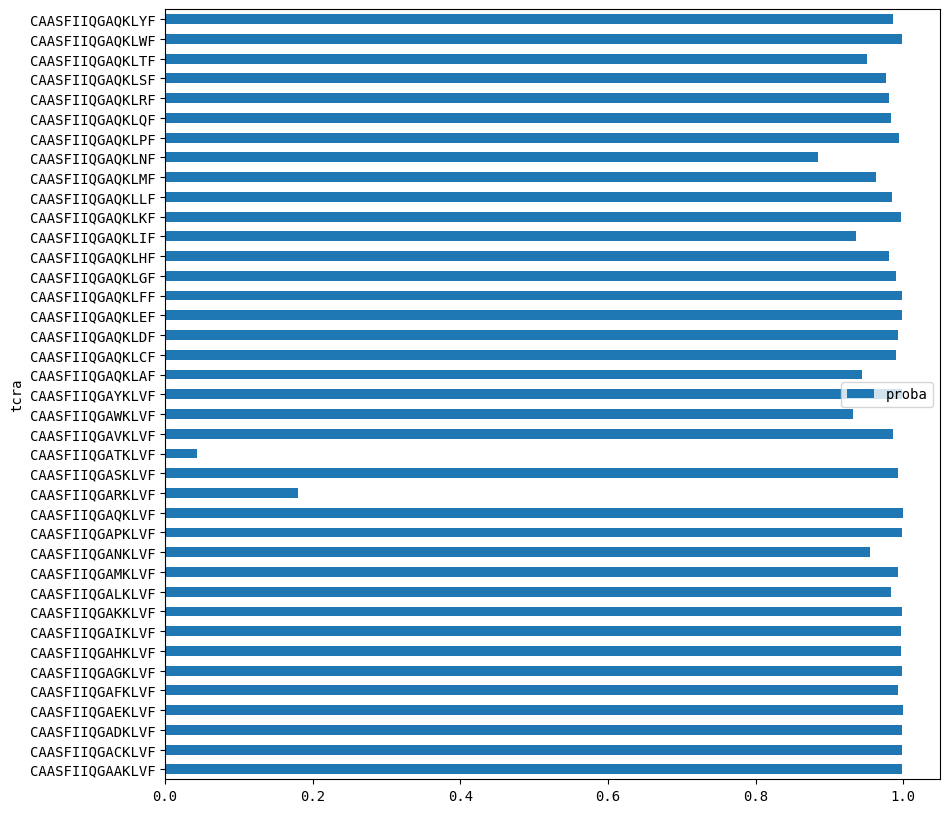

In [37]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "monospace"

df_5tez.query('tcrb=="CASSLLGGWSEAFF"').set_index('tcra')[['proba']].plot.barh(
    figsize=(10,10),)


<Axes: ylabel='tcrb'>

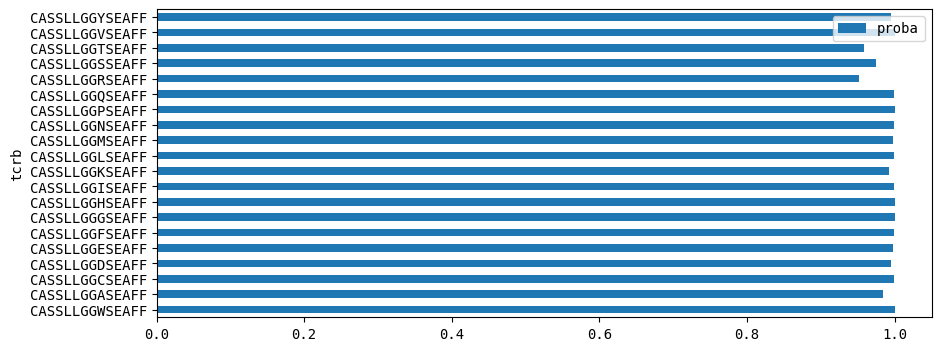

In [38]:
df_5tez.query('tcra=="CAASFIIQGAQKLVF"').set_index('tcrb')[['proba']].plot.barh(figsize=(10,4))

In [39]:
def take_not_zero_len_seq(df):
    df = df[df['tcrb'].apply(len)!=0]
    df = df[df['tcra'].apply(len)!=0]
    df = df[df['peptide'].apply(len)!=0]
    return df


In [40]:

import argparse
from sklearn.metrics import average_precision_score, precision_score, recall_score

def show_numbers(args):
    
    df_distance = pd.read_parquet(args.residue_distances)
    df_explained = take_not_zero_len_seq(
        pd.read_parquet(args.input_filepath)
    )
    df_bondinfo = pd.read_parquet(f"../data/{args.datetimehash}__df_bondinfo.parquet")
    df_seq = pd.read_parquet(args.seqfile)

    if 'pdbid' not in df_explained.columns and 'pdbid_x' in df_explained.columns:
        df_explained['pdbid'] = df_explained['pdbid_x']

    temp = df_explained.drop_duplicates(subset='pdbid').drop_duplicates(subset=['peptide', 'tcra','tcrb']).copy()
    print("pos pred value_counts = ", (temp.proba>0.5).value_counts().to_dict())
    print('  average precision = ', average_precision_score(temp.proba>0, temp.proba))
    print('  precision = ', precision_score(temp.proba>0, temp.proba>0.5))
    print('  recall = ', recall_score(temp.proba>0, temp.proba>0.5))
    print()

    # Print # of unique PDBs
    print('df_distance.pdbid.nunique() = ',df_distance.pdbid.nunique())
    print('df_explained.pdbid.nunique() = ',df_explained.pdbid.nunique())
    print('df_bondinfo.pdbid.nunique() = ',df_bondinfo.pdbid.nunique())
    print('df_seq.pdbid.nunique() = ',df_seq.pdbid.nunique())

    # Filter out proba<0.5 because we only want to analyze the positive predictions
    df_explained_pos = df_explained[df_explained.proba>0.5].drop_duplicates(subset='pdbid').drop_duplicates(subset=['peptide', 'tcra','tcrb'])
    
    df_explained_all = df_explained.drop_duplicates(subset='pdbid').drop_duplicates(subset=['peptide', 'tcra','tcrb'])

    
    
    if 'tcr_pep_combined' not in df_seq.columns and 'tcr_a' in df_seq.columns:
        df_seq['tcr_pep_combined'] = df_seq['tcr_a'] + ':' + df_seq['tcr_b']  + ':' + df_seq['peptide']

    if 'tcr_pep_combined' not in df_seq.columns and 'tcra' in df_seq.columns:
        df_seq['tcr_pep_combined'] = df_seq['tcra'] + ':' + df_seq['tcrb']  + ':' + df_seq['peptide']

    pdbs_seqs = set(df_seq.pdbid.unique().tolist())
    pdbs_bondinfo = set(df_bondinfo.pdbid.unique().tolist())

    pdbs_explained = set(df_explained_all.pdbid.unique().tolist())
    pdbs_intersection = sorted(list(pdbs_seqs & pdbs_explained & pdbs_bondinfo))
    print('len(pdbs_intersection) BEFORE taking pos = ',len(pdbs_intersection))
    print(", ".join(pdbs_intersection))
    
    print()
    a = df_seq[df_seq.pdbid.isin(pdbs_intersection)].tcr_pep_combined.isin(df_entire.tcr_pep_combined).value_counts().to_dict()[True]
    print(f"Of these {len(pdbs_intersection)} structures, {a} had the same sequences in the entire data.", 
          )
    print()
    
    pdbs_explained = set(df_explained_pos.pdbid.unique().tolist())
    pdbs_intersection = sorted(list(pdbs_seqs & pdbs_explained & pdbs_bondinfo))
    print('len(pdbs_intersection) AFTER taking pos = ',len(pdbs_intersection))
    print(", ".join(pdbs_intersection))

    
    
    
    # main(args)

    

# seqs of standard-self-attemtion

In [41]:

parser = argparse.ArgumentParser()
parser.add_argument("--seqfile", type=str, default="../data/pdb_complex_sequencesV2.parquet")
parser.add_argument("--checkpointsjson", type=str, default="../hpo_params/checkpoints.json")
parser.add_argument("--input_filepath", type=str, default="../data/pdb_complex_sequencesV2_entire_self_newemb__explained.parquet")
parser.add_argument("--datetimehash", type=str, default='20230828_015709')

args = parser.parse_args([])

args.residue_distances = f"./../data/{args.datetimehash}__residue_distances.parquet"
args.output_statspath = args.input_filepath.replace(".parquet", f"__stats{args.datetimehash}.csv")

df_explained = pd.read_parquet(args.input_filepath)
df_explained_all = df_explained.drop_duplicates(subset='pdbid').drop_duplicates(subset=['peptide', 'tcra','tcrb'])


show_numbers(args)

pos pred value_counts =  {True: 54, False: 28}
  average precision =  1.0
  precision =  1.0
  recall =  0.6585365853658537

df_distance.pdbid.nunique() =  147
df_explained.pdbid.nunique() =  97
df_bondinfo.pdbid.nunique() =  147
df_seq.pdbid.nunique() =  129
len(pdbs_intersection) BEFORE taking pos =  82
1D9K, 1FYT, 1G6R, 1ZGL, 2AK4, 2BNQ, 2CKB, 2E7L, 2F54, 2J8U, 2NX5, 2OI9, 2P5E, 2PXY, 2VLJ, 2VLR, 3DXA, 3E2H, 3E3Q, 3GSN, 3HG1, 3MBE, 3MV8, 3PQY, 3QDG, 3QDJ, 3QDM, 3QEQ, 3QIB, 3QIU, 3QIW, 3TF7, 3TFK, 3TJH, 3TPU, 3VXR, 3VXS, 3W0W, 4JFD, 4JFE, 4JFF, 4JRX, 4JRY, 4L3E, 4MJI, 4OZG, 4OZH, 4P2O, 4P2Q, 4P2R, 4PRH, 4PRP, 4QOK, 4Z7W, 5BRZ, 5BS0, 5D2L, 5E6I, 5EU6, 5EUO, 5HHO, 5ISZ, 5IVX, 5KS9, 5KSA, 5MEN, 5NME, 5NMF, 5NMG, 5SWS, 5SWZ, 5TEZ, 5WKF, 5WKH, 5WLG, 6AVF, 6AVG, 6EQA, 6EQB, 6PX6, 6V13, 6V15

Of these 82 structures, 37 had the same sequences in the entire data.

len(pdbs_intersection) AFTER taking pos =  54
1D9K, 1FYT, 1G6R, 1ZGL, 2AK4, 2BNQ, 2CKB, 2F54, 2NX5, 2P5E, 2PXY, 2VLJ, 2VLR, 3DXA, 

# seqs of cross-attemtion

In [42]:
parser = argparse.ArgumentParser()
parser.add_argument("--seqfile", type=str, default="../data/pdb_complex_sequencesV2.parquet")
parser.add_argument("--checkpointsjson", type=str, default="../hpo_params/checkpoints.json")
parser.add_argument("--input_filepath", type=str, default="../data/pdb_complex_sequencesV2_entire_cross_newemb__explained.parquet")
parser.add_argument("--datetimehash", type=str, default='20230828_015709')

args = parser.parse_args([])

args.residue_distances = f"./../data/{args.datetimehash}__residue_distances.parquet"
args.output_statspath = args.input_filepath.replace(".parquet", f"__stats{args.datetimehash}.csv")

df_explained = pd.read_parquet(args.input_filepath)
df_explained_all = df_explained.drop_duplicates(subset='pdbid').drop_duplicates(subset=['peptide', 'tcra','tcrb'])

show_numbers(args)

pos pred value_counts =  {True: 52, False: 30}
  average precision =  1.0
  precision =  1.0
  recall =  0.6341463414634146

df_distance.pdbid.nunique() =  147
df_explained.pdbid.nunique() =  97
df_bondinfo.pdbid.nunique() =  147
df_seq.pdbid.nunique() =  129
len(pdbs_intersection) BEFORE taking pos =  82
1D9K, 1FYT, 1G6R, 1ZGL, 2AK4, 2BNQ, 2CKB, 2E7L, 2F54, 2J8U, 2NX5, 2OI9, 2P5E, 2PXY, 2VLJ, 2VLR, 3DXA, 3E2H, 3E3Q, 3GSN, 3HG1, 3MBE, 3MV8, 3PQY, 3QDG, 3QDJ, 3QDM, 3QEQ, 3QIB, 3QIU, 3QIW, 3TF7, 3TFK, 3TJH, 3TPU, 3VXR, 3VXS, 3W0W, 4JFD, 4JFE, 4JFF, 4JRX, 4JRY, 4L3E, 4MJI, 4OZG, 4OZH, 4P2O, 4P2Q, 4P2R, 4PRH, 4PRP, 4QOK, 4Z7W, 5BRZ, 5BS0, 5D2L, 5E6I, 5EU6, 5EUO, 5HHO, 5ISZ, 5IVX, 5KS9, 5KSA, 5MEN, 5NME, 5NMF, 5NMG, 5SWS, 5SWZ, 5TEZ, 5WKF, 5WKH, 5WLG, 6AVF, 6AVG, 6EQA, 6EQB, 6PX6, 6V13, 6V15

Of these 82 structures, 37 had the same sequences in the entire data.

len(pdbs_intersection) AFTER taking pos =  52
1D9K, 1G6R, 1ZGL, 2AK4, 2BNQ, 2CKB, 2F54, 2J8U, 2NX5, 2P5E, 2PXY, 2VLJ, 2VLR, 3DXA, 